## **Final Project Submission**

Please fill out:


* Group name:   
                Group 5
* Student names:
                Japhet chebiywo
                Lisa Mwikali
                Purity Gitonga
                Cynthia Dalmas
                Brian Ochieng
                Bethuel Maruru            
* Student pace:
                Part timeme
* Scheduled project review date/time:

* Instructor name:
                William Okomba and Noan Kandie
* Blog post URL:

## **Content**

*   Introduction
*   Objectives
*   Data Preprocessing
*   Feature Engineering
*   Exloratory data Analysis(EDA)
*   Model Building








## **Introduction**
We are exploring the King County House Sales dataset. The data contains Information on houses sold in the king county in the USA. The data includes various features such as house characteristics, location and sales price.

## **Objective**

The objective of the analysis is to use the King County House Sales dataset tobuild a liner regression model to predict house prices. We will use the Independent Variables to predict the house price through a linear regression model.

## **Data Preprocessing**

In [153]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics


In [154]:
#loading and previewing the data
data = pd.read_csv("/content/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [155]:
# Viewing a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the summary of the data, there are 21,597 rows and 21 columns.
There are null values in three columns i.e. waterfront,view and yr_renovated.

In [156]:
# Viewing summary statistics for numerical columns
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### **Handling missing values**

In [157]:
#checking for null values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [158]:
#checking for proportions of the null values
data.isnull().mean()*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

The proportion of the missing values in the yr_renovated and waterfront columns is greater than 10%. We have decided to dropthose columns.
For the missing values in view columns are 0.29% we have decided to impute the missing values

In [159]:
#dropping null values in the yr_renovated column and waterfront
data.drop(columns=["yr_renovated","waterfront"],inplace = True,axis = 1)


In [160]:
# Calculating the mode for the view column
view_mode = data.view.mode()[0]
view_mode

'NONE'

In [161]:
#imputing the values for view
data['view'].fillna(view_mode, inplace=True)


In [162]:
#Confirming there are no more null values
data.isnull().mean()*100

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

### **Feature Engineering**

In [163]:
# Extracting the numeric part of the grade column
data.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [164]:
#Apply feature engineering to grade column
data.grade.str.split().apply(lambda x : x[0])

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: object

In [165]:
#replace the grade column with the extracted numbers
data["grade"] = data.grade.str.split().apply(lambda x : x[0])
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NONE,Average,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NONE,Average,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NONE,Average,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NONE,Average,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NONE,Average,7,1020,0.0,2008,98144,47.5941,-122.299,1020,1357


In [166]:
# changing the data type of the column grade to integer
data['grade']=data['grade'].astype('int')

In [167]:
# Viewing the unique values of the condition column
data['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [168]:
# Replacing the condition column with the generated hieracical numbers
data['condition']= data['condition'].map(lambda x: 1 if x=='Poor' else 2 if x=='Fair' else 3
                      if x=='Average' else 4 if x=='Good' else 5 if x=='Very Good' else 0)

In [169]:

data['condition'].value_counts()

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

In [170]:
# unique columns for the view column
data['view'].value_counts()

view
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [171]:
# Replacing the view column with the generated hieracical numbers
data['view']= data['view'].map(lambda x: 1 if x=='NONE' else 2 if x=='FAIR' else 3
                      if x=='AVERAGE' else 4 if x=='GOOD' else 5 if x=='EXCELLENT' else 0)

In [172]:
# Generating Age of the house at the time of selling
data['Year_sold']=data['date'].apply(lambda x: x[-4:])
data['Year_sold']=data['Year_sold'].astype('int')
data['Age']=data['Year_sold']-data['yr_built']

In [173]:
# Viewing the new features
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Year_sold,Age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,1,3,...,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,1,3,...,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,1,3,...,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1,5,...,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1,3,...,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2015,28


In [174]:
# Viweing unique values in the sqft_basement column
data["sqft_basement"].value_counts()

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [175]:
# Cleaning the data frame and removing any ? mark
data = data.applymap(lambda x : 0.0 if x == "?" else x)
data["sqft_basement"].value_counts()


sqft_basement
0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [176]:
# changing the sqft_basement column to float
data["sqft_basement"] = data["sqft_basement"].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

### **Exploratory Data Analysis (EDA)**

In [177]:
#correlation between price and the other variables
# data.corr()
data.select_dtypes (['float','int']).corr()['price']
# data.corr()["price"]

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
view             0.393497
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.321108
yr_built         0.053953
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Year_sold        0.003727
Age             -0.053890
Name: price, dtype: float64

In [178]:
#list of the columns to drop that have a low correlation to the price
columns_to_drop = ['date',"id", "sqft_lot","yr_built","long","sqft_lot15","zipcode",'condition','Age','Year_sold']


In [179]:
#dropping the columns
data.drop(columns = columns_to_drop, inplace = True)


In [180]:
# Viewing the correlation between price and other variables
data.select_dtypes (['float','int']).corr()['price']

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
floors           0.256804
view             0.393497
grade            0.667951
sqft_above       0.605368
sqft_basement    0.321108
lat              0.306692
sqft_living15    0.585241
Name: price, dtype: float64

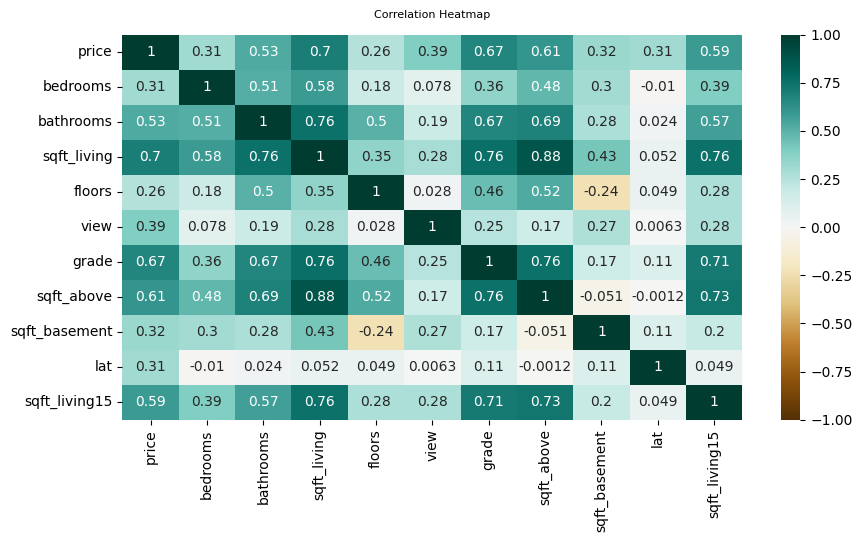

In [181]:
# Visualize relationships between key features and house prices
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(data.select_dtypes (['float','int']).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12);

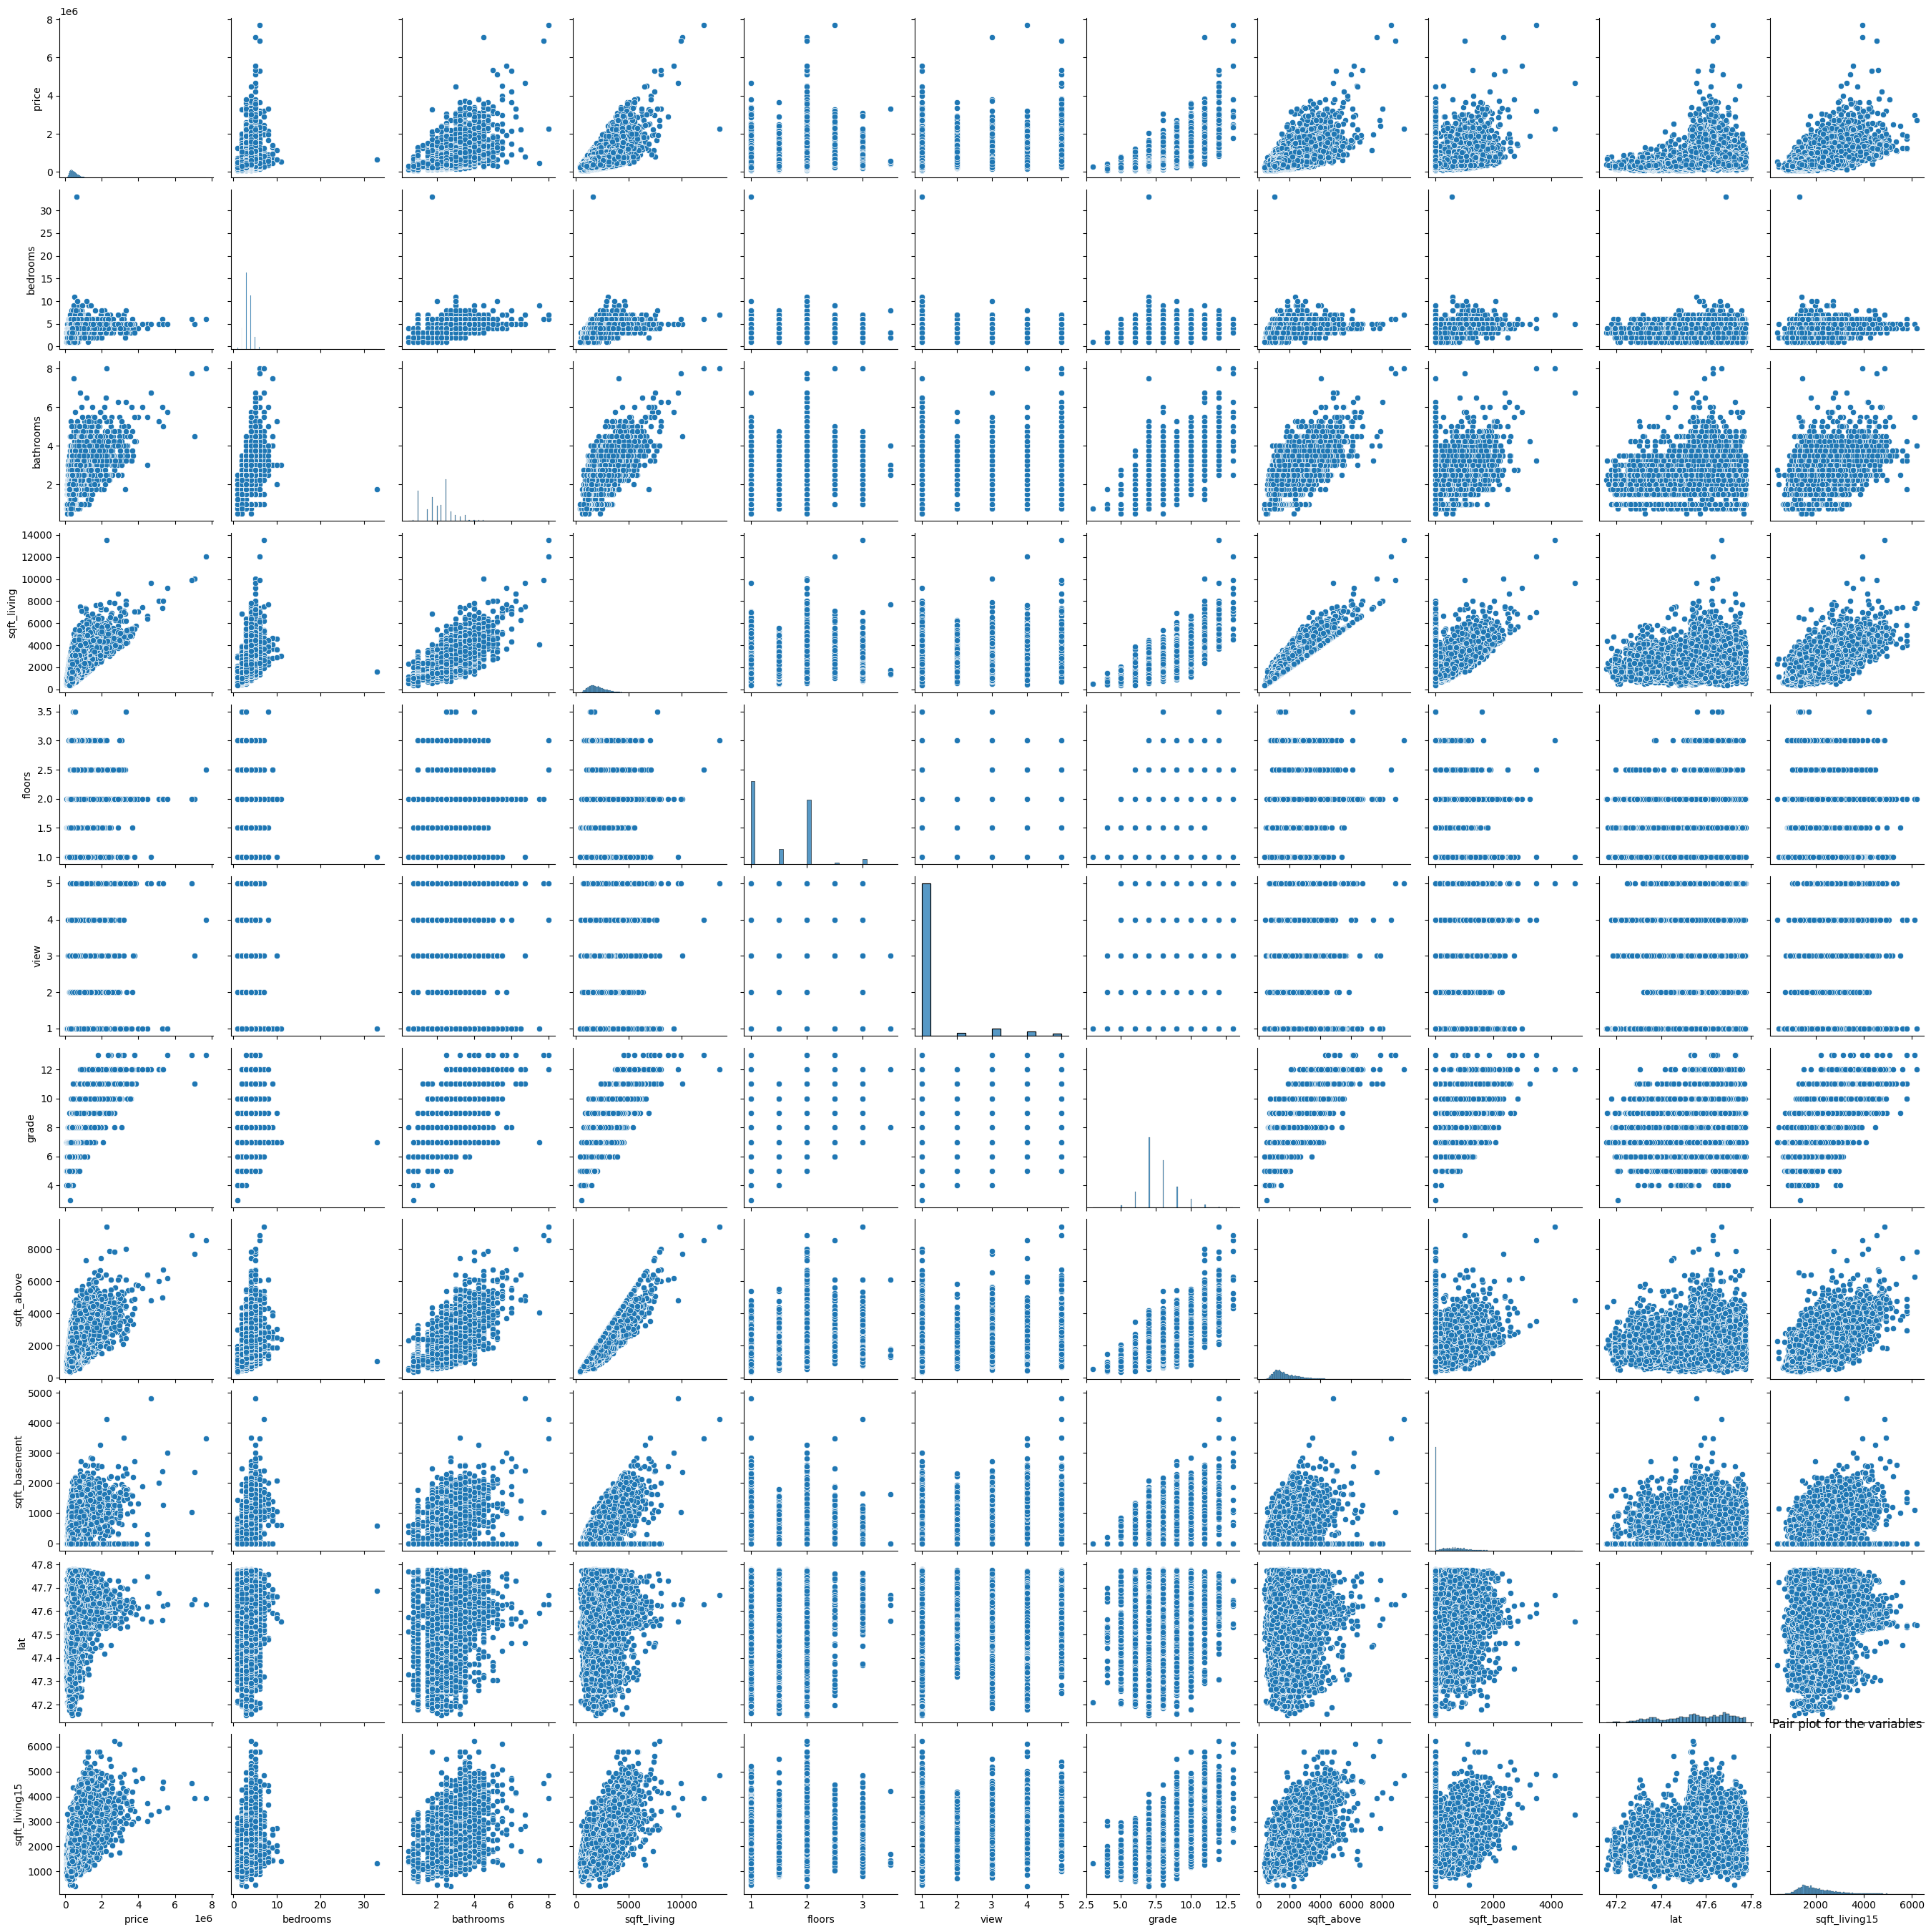

In [182]:
# Viewing the relationship amongst variables using a pair plot
sns.pairplot(data)
plt.title('Pair plot for the variables');

In [183]:
# Droping variables that have a linear correlation amongst themselves
colunms_drop=['sqft_above','sqft_living15']
data.drop(columns=colunms_drop,inplace=True)

## **Building Regression Models**

In [184]:
# baseline dependent and independent variables using sqft_living
# since it has a higer correlation to price as compared to other variables.
y = data["price"]
X = data["sqft_living"]

In [185]:
#Baseline model
baseline_model = sm.OLS(y,sm.add_constant(X))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:04:59   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
# Viewing the baseline parameters
baseline_results.params

const         -43988.892194
sqft_living      280.863014
dtype: float64

##### **Interpratation of the baseline model**
R-squared of 0.493 The model is explaining 49.3% of the change in price.

Comapring the P value of F which is 0.00 with the standard alpha of 0.05, our model is statistically significant since the the value is less than the alpha value.

when X is 0 the price will be -43,988

when x increases by 1 unit the price will increase by 280.

Equation for our model Price = 280.86X - 43988.89





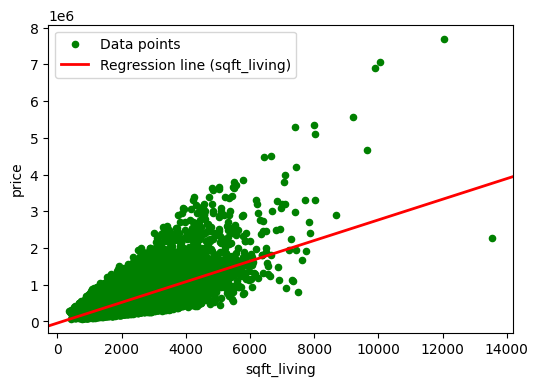

In [187]:
# visualising the scatter plot and the line of best fit for the baseline model
fig, ax = plt.subplots(figsize=(6,4))
data.plot(x='sqft_living', y='price', kind="scatter", label="Data points", ax=ax, c='green')
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line (sqft_living)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

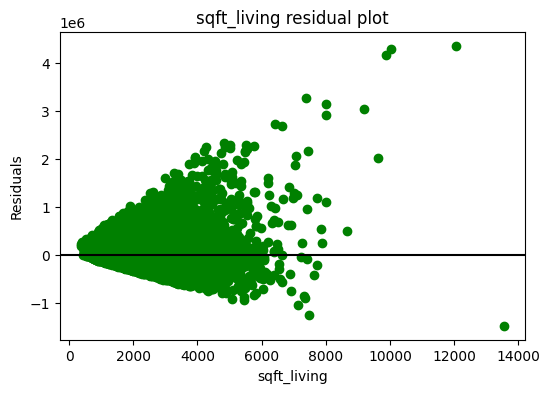

In [188]:
# residual plot for our baseline model
residuals=baseline_results.resid
X=data['sqft_living']

fig, ax=plt.subplots(figsize=(6,4))
ax.scatter(X,residuals,c='green')
ax.axhline(y=0,c='black')
ax.set_xlabel('sqft_living')
ax.set_ylabel('Residuals')
plt.title('sqft_living residual plot');

In [189]:
# Mutliple linear regression model based using all numerical field

columns_int=data.select_dtypes( 'int')
columns_int
columns_float=data.select_dtypes( 'float')
columns_float

columns_int_float =list(columns_int.columns) + list(columns_float.columns)
columns_int_float.remove('price')


y=data['price']
X=data[columns_int_float]

second_model=sm.OLS(endog=y,exog=sm.add_constant(X))
second_results=second_model.fit()
second_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     4803.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:05:00   Log-Likelihood:            -2.9635e+05
No. Observations:               21597   AIC:                         5.927e+05
Df Residuals:                   21588   BIC:                         5.928e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.218e+07   5.25e+05    -61.282      0.000   -3.32e+07   -3.12e+07
bedrooms      -2.901e+04   2059.575    -14.087      0.000   -3.31e+04    -2.5e+04
sqft_living     199.5426      3.489     57.199      0.000     192.705     206.380
view            9.39e+04   2103.379     44.642      0.000    8.98e+04     9.8e+04
grade          8.178e+04   2187.692     37.384      0.000    7.75e+04    8.61e+04
bathrooms     -4158.0755   3345.798     -1.243      0.214   -1.07e+04    2399.937
floors        -2.764e+04   3713.135     -7.443      0.000   -3.49e+04   -2.04e+04
sqft_basement    -1.7950      4.491     -0.400      0.689     -10.598       7.008
lat            6.669e+05   1.11e+04     60.214      0.000    6.45e+05    6.89e+05
==============================================================================
Omnibus:                    18735.051   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1702719.450
Skew:                           3.729   Prob(JB):                         0.00
Kurtosis:                      45.855   Cond. No.                     8.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
# viewing the coefficients for the multiple linear regression
second_results.params

const           -3.218420e+07
bedrooms        -2.901335e+04
sqft_living      1.995426e+02
view             9.389958e+04
grade            8.178408e+04
bathrooms       -4.158075e+03
floors          -2.763731e+04
sqft_basement   -1.795045e+00
lat              6.668567e+05
dtype: float64

##### **Interpratation of the mutliple linear regression model**
R-squared of 0.64 The model is now explaining 64% of the change in price.

Comapring the P value of F which is 0.00 with the standard alpha of 0.05, our model is statistically significant since the the value is less than the alpha value.

when all independent variables are 0 the price will be -3,218,420

In [191]:
# Revising the model by droping variables that have a P(t) greater than a standard alpha of 0.05
data.drop(columns=['sqft_basement','bathrooms'],inplace=True)


columns_int=data.select_dtypes( 'int')
columns_int
columns_float=data.select_dtypes( 'float')
columns_float

columns_int_float =list(columns_int.columns) + list(columns_float.columns)
columns_int_float.remove('price')

# Revising the mutliple linear regression model
y=data['price']
X=data[columns_int_float]

revised_second_model=sm.OLS(y,sm.add_constant(X))
revised_second_model_results=revised_second_model.fit()
revised_second_model_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     6403.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:07:45   Log-Likelihood:            -2.9635e+05
No. Observations:               21597   AIC:                         5.927e+05
Df Residuals:                   21590   BIC:                         5.928e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.218e+07   5.18e+05    -62.105      0.000   -3.32e+07   -3.12e+07
bedrooms    -2.955e+04   2021.669    -14.616      0.000   -3.35e+04   -2.56e+04
sqft_living   197.2828      2.979     66.234      0.000     191.445     203.121
view         9.376e+04   2068.421     45.329      0.000    8.97e+04    9.78e+04
grade        8.157e+04   2123.408     38.413      0.000    7.74e+04    8.57e+04
floors      -2.851e+04   3143.876     -9.069      0.000   -3.47e+04   -2.24e+04
lat          6.668e+05   1.09e+04     61.076      0.000    6.45e+05    6.88e+05
==============================================================================
Omnibus:                    18733.272   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1700656.549
Skew:                           3.729   Prob(JB):                         0.00
Kurtosis:                      45.828   Cond. No.                     7.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

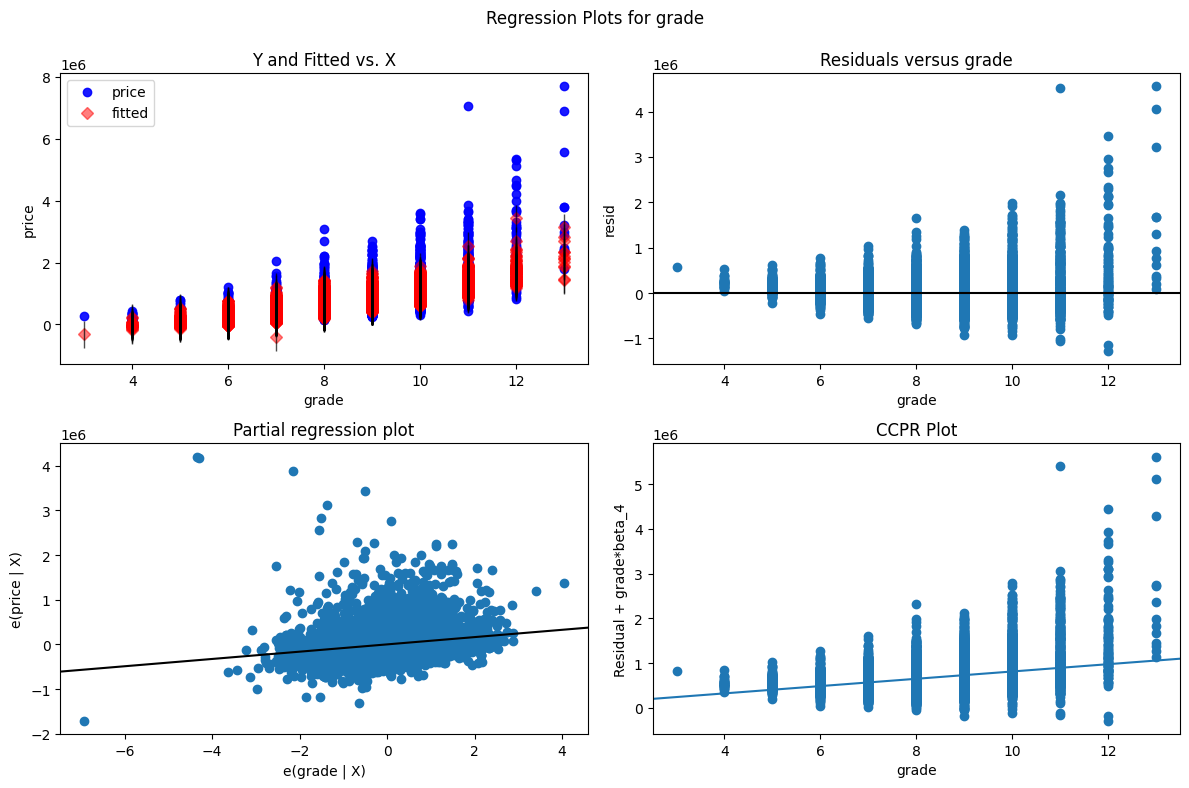

In [192]:
# Plotting the fitted
#checking resideual for caret variable
sm.graphics.plot_regress_exog(revised_second_model_results, 'grade', fig=plt.figure(figsize=(12,8)));

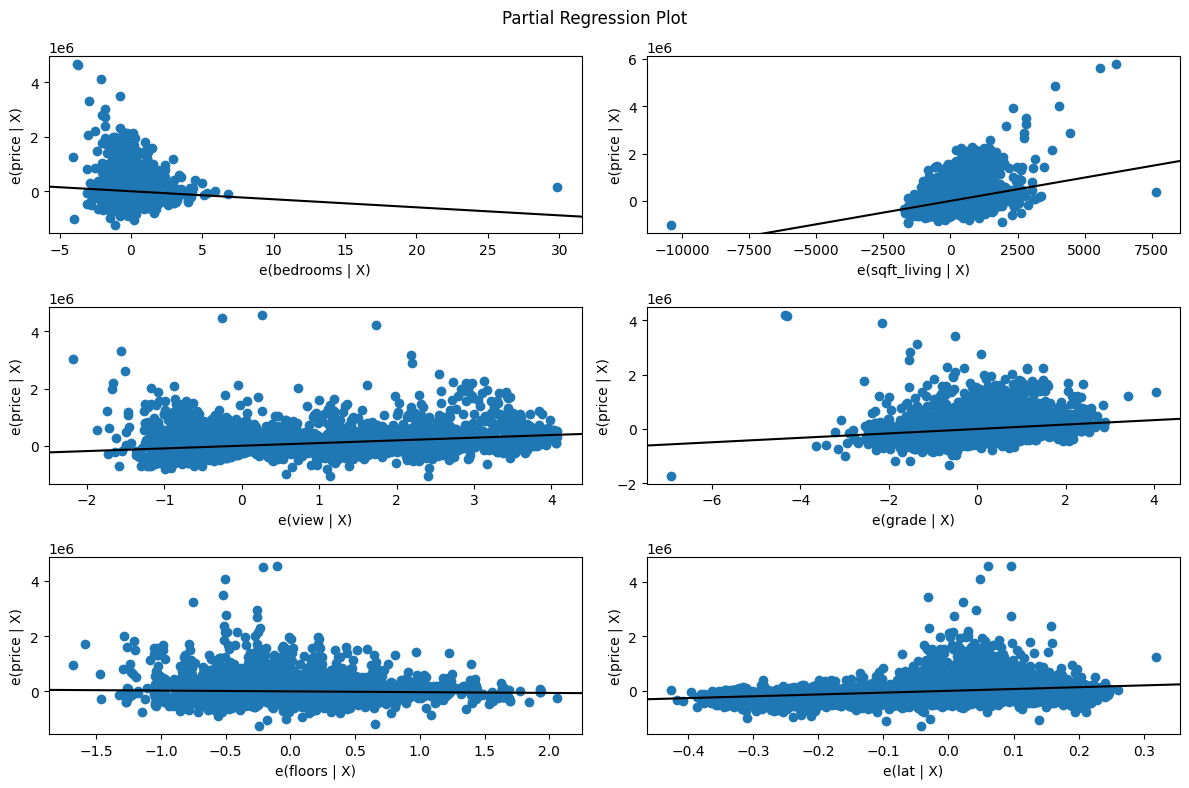

In [193]:
# ploting partial Regression plots for the multiple linear regression.
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(revised_second_model_results,exog_idx=list(X.columns),fig=fig)
plt.tight_layout();

In [194]:
# generating a list for the columns to one hot encode
columns_to_ohe=list(data.select_dtypes(include='object').columns)[1:]
columns_to_ohe

[]

#### **Polynomial regression**

In [205]:
# polynimial regression 2 degrees
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()

features1=['bedrooms','grade','sqft_living','floors','lat','view']

polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('PR_Model_2')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))


PR_Model_2
Mean Squared Error (MSE)  200710.51
R-squared (training)  0.715
R-squared (testing)  0.708


In [206]:
# polynimial regression 3 degrees
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()

features1=['bedrooms','grade','sqft_living','floors','lat','view']

polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('PR_Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

PR_Model_3
Mean Squared Error (MSE)  192833.78
R-squared (training)  0.738
R-squared (testing)  0.731


In [207]:
# polynimial regression 4 degrees
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()

features1=['bedrooms','grade','sqft_living','floors','lat','view']

polyfeat=PolynomialFeatures(degree=4)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('PR_Model_4')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

PR_Model_4
Mean Squared Error (MSE)  192963.83
R-squared (training)  0.749
R-squared (testing)  0.73


In [208]:
# polynimial regression 5 degrees
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()

features1=['bedrooms','grade','sqft_living','floors','lat','view']

polyfeat=PolynomialFeatures(degree=5)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('PR_Model_5')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

PR_Model_5
Mean Squared Error (MSE)  206093.91
R-squared (training)  0.752
R-squared (testing)  0.692


### Findings and Conclusion

PR_Model_3 gives us R-squared (testing) score of 0.731. From above reports, we can conclude that Polynomial regression is best solution.

A polynomial regression model can be used to explain a 73.1% change in price as a result of renovation at a mean sales price of $192,833.78
